Q1. Do K-fold cross-validation to select optimal $\lambda$ for lasso method.

Requirement: 
1. Use MSE as the criterion.

2. do not use any packages about cross-validation.

3. you are allowed to use "from sklearn.linear_model import Lasso".

In [4]:
from sklearn.linear_model import Lasso
import numpy as np
from sklearn.metrics import mean_squared_error

In [8]:
def k_fold_cross_validation_lasso(X, y, lambdas, K=5):
    # 将数据划分为 K 个子集
    fold_size = len(X) // K
    indices = np.arange(len(X))
    np.random.shuffle(indices)  # 随机打乱数据索引

    # 存储每个 lambda 对应的 平均MSE
    avg_mse_per_lambda = []

    for lmbda in lambdas:
        mse_folds = [] # 存储当前lmbda每次fold的mse

        for k in range(K):
            # 划分训练集和验证集
            val_indices = indices[k * fold_size:(k + 1) * fold_size]
            train_indices = np.setdiff1d(indices, val_indices) 
            # 计算 indices 与 val_indices 的差集，即返回在 indices 中但不在 val_indices 中的元素。这些元素就是当前折中的训练集索引。

            X_train, X_val = X[train_indices], X[val_indices]
            y_train, y_val = y[train_indices], y[val_indices]

            # 使用当前 lambda 值训练 Lasso 模型
            model = Lasso(alpha=lmbda)
            model.fit(X_train, y_train)

            # 在验证集上计算 MSE
            y_val_pred = model.predict(X_val)
            mse = mean_squared_error(y_val, y_val_pred)
            mse_folds.append(mse)

        # 计算当前 lambda 下 K 折的平均 MSE
        avg_mse = np.mean(mse_folds)
        avg_mse_per_lambda.append(avg_mse)

    # 找到平均 MSE 最小的 lambda
    optimal_lambda = lambdas[np.argmin(avg_mse_per_lambda)]
    return optimal_lambda, avg_mse_per_lambda


X = np.random.rand(1000, 10)  # 假设有 100 个样本，每个样本有 10 个特征
y = np.random.rand(1000)      # 目标变量

# 候选的 lambda 值
lambdas = [0.01, 0.1, 1, 10, 100]

# 执行 K 折交叉验证
optimal_lambda, avg_mse_per_lambda = k_fold_cross_validation_lasso(X, y, lambdas, K=5)
print("Optimal lambda:", optimal_lambda)
print("Average MSE per lambda:", avg_mse_per_lambda)


Optimal lambda: 0.01
Average MSE per lambda: [0.08653523105907646, 0.08653523105907646, 0.08653523105907646, 0.08653523105907646, 0.08653523105907646]


In [9]:
#X = np.random.rand(100, 10)
#len(X)

Q2 Let $(X_i,Y_i) i = 1,\cdots,n$ be i.i.d. copies of $(X,Y)\in\mathbb{R}^p\times\{0,1\}.$ Assume they follow probit model, that is, $P(Y=1|X)=\Phi(X^\top \beta),$ where  $\Phi(t)$ is cumulative distribution function of the standard normal distribution and $\beta$ is an unknown function. (no python code for this question)

1. write the liikelihood function of $\beta.$
2. how do you use gradient descent to get estimation of $\beta.$ write main update steps.

## Probit Model Estimation Using Gradient Descent

Let $(X_i, Y_i)_{i=1, \ldots, n}$ be i.i.d. copies of $(X, Y) \in \mathbb{R}^p \times \{0, 1\}$. Assume they follow a probit model, that is, 
$$
P(Y = 1 | X) = \Phi(X^\top \beta),
$$
where $\Phi(t)$ is the cumulative distribution function (CDF) of the standard normal distribution and $\beta$ is an unknown parameter vector to be estimated.

We are asked to:
1. Write the likelihood function of $\beta$.
2. Describe how to use gradient descent to estimate $\beta$, including the main update steps.

### 1. Likelihood Function of $\beta$

Given that we assume a probit model, we have:
$$
P(Y_i = 1 | X_i) = \Phi(X_i^\top \beta),
$$
where $\Phi$ is the CDF of the standard normal distribution. Consequently,
$$
P(Y_i = 0 | X_i) = 1 - \Phi(X_i^\top \beta).
$$

The likelihood function for $\beta$ given the observed data $\{(X_i, Y_i)\}_{i=1}^n$ is the product of the probabilities for each observed pair $(X_i, Y_i)$:
$$
L(\beta) = \prod_{i=1}^n \left[ \Phi(X_i^\top \beta) \right]^{Y_i} \left[ 1 - \Phi(X_i^\top \beta) \right]^{1 - Y_i}.
$$

Taking the logarithm to obtain the log-likelihood, we get:
$$
\ell(\beta) = \sum_{i=1}^n \left( Y_i \log \Phi(X_i^\top \beta) + (1 - Y_i) \log (1 - \Phi(X_i^\top \beta)) \right).
$$

### 2. Using Gradient Descent to Estimate $\beta$

To estimate $\beta$ using gradient descent, we need to find the gradient of the log-likelihood function with respect to $\beta$ and then iteratively update $\beta$ in the direction that maximizes the log-likelihood.

#### Step 1: Compute the Gradient of the Log-Likelihood

The gradient of $\ell(\beta)$ with respect to $\beta$ is:
$$
\nabla_\beta \ell(\beta) = \sum_{i=1}^n \left( \frac{Y_i}{\Phi(X_i^\top \beta)} - \frac{1 - Y_i}{1 - \Phi(X_i^\top \beta)} \right) \phi(X_i^\top \beta) X_i,
$$
where $\phi$ is the probability density function (PDF) of the standard normal distribution. This derivative is obtained by applying the chain rule and noting that $\Phi'(t) = \phi(t)$.

where $\phi$ is expressed as :
$$
f(x) = \frac{1}{\sqrt{2 \pi}} \exp \left( -\frac{x^2}{2} \right)
$$


#### Step 2: Gradient Descent Update Rule

Starting with an initial guess $\beta^{(0)}$, the update rule in gradient descent is:
$$
\beta^{(k+1)} = \beta^{(k)} + \alpha \nabla_\beta \ell(\beta^{(k)}),
$$
where $\alpha$ is the learning rate (step size).

#### Step 3: Iteration

Repeat the update step until convergence, i.e., until $\|\nabla_\beta \ell(\beta^{(k)})\|$ is sufficiently close to zero or does not change significantly between iterations.

### Summary of the Main Update Steps

1. **Initialize** $\beta$ (e.g., $\beta^{(0)} = 0$ or **np.random.normal($\mu$, $\sigma$, $dimension(\beta)$))**.
2. **Calculate** $\nabla_\beta \ell(\beta)$ based on the observed data and current $\beta^{(k)}$ value.
3. **Update** $\beta$ using $\beta^{(k+1)} = \beta^{(k)} + \alpha \nabla_\beta \ell(\beta^{(k)})$.
4. **Repeat** steps 2 and 3 until convergence.

This approach iteratively adjusts $\beta$ to maximize the log-likelihood, thus providing an estimate for $\beta$ in the probit model.



$ \top $
`np.random.normal(\$mu\$, \$σ\$, \$dimension(β)\$)`


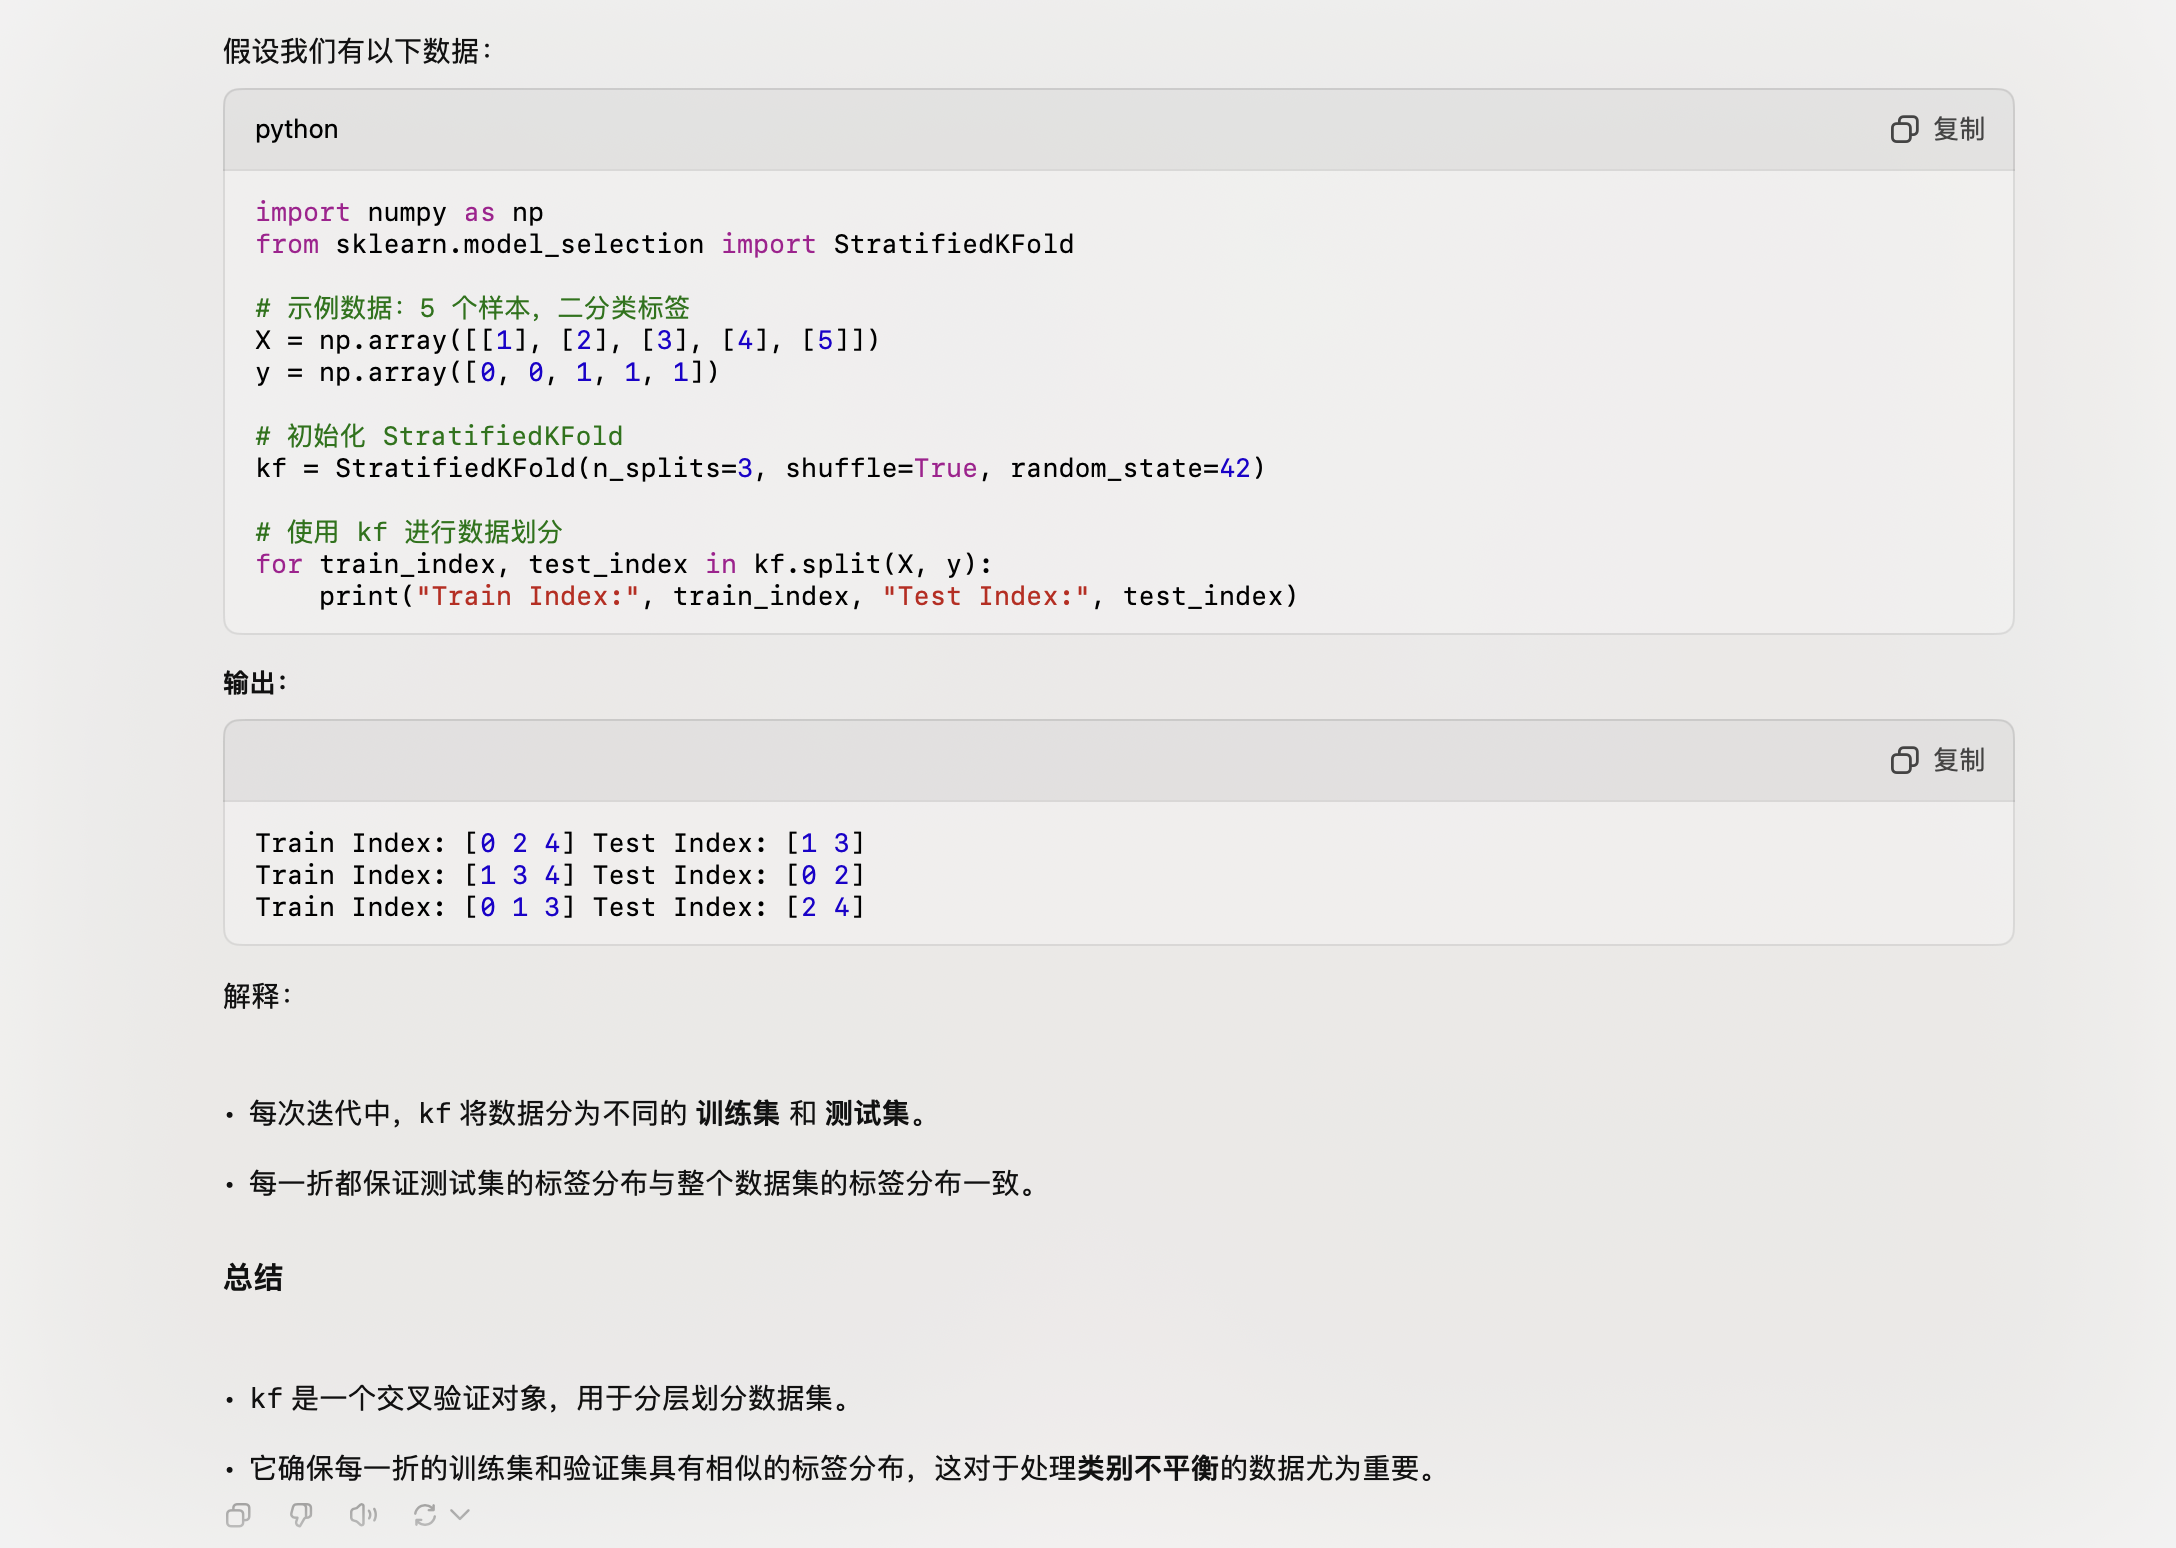

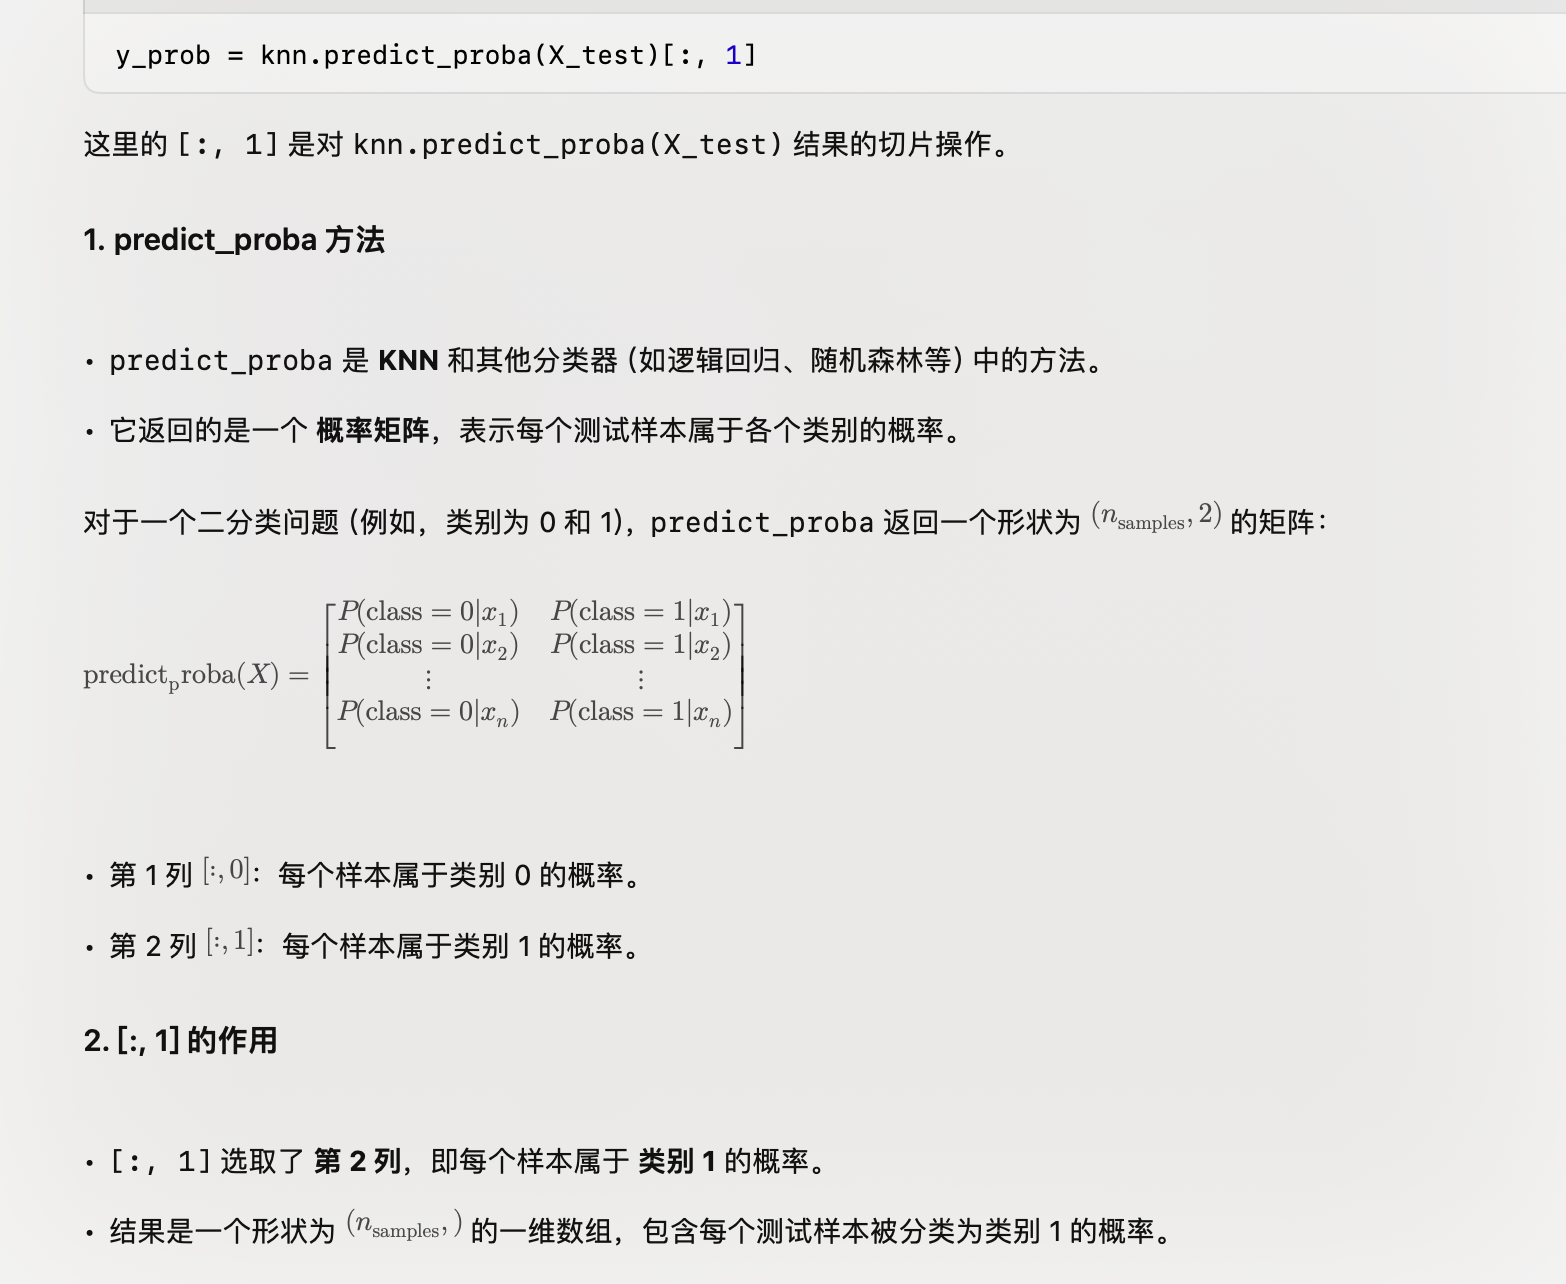